In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
import time
from keras.optimizers import Adam

In [46]:
mnist = keras.datasets.mnist
# 시드값 고정
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [47]:
# keras can do
# 0~9 손글씨
# train 60000, test 10000
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 정규화 비슷
X_train = X_train /255.0
X_test = X_test /255.0


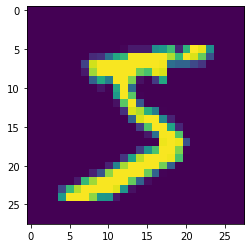

In [48]:
plt.imshow(X_train[0])

In [49]:
# hidden layer 추가 / 오히려 떨어짐
# 학습률 추가
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation='relu'))
# model.add(Dense(512, activation='relu'))
# 오버피팅 방지 (Dropout(0.2) 20프로를 빼겠다.)
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# learning_rate 변경
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [50]:
%%time
start_t = time.time()
model.fit(X_train, y_train, epochs=5)
print(f'학습시간: {time.time()-start_t}')

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2181 - accuracy: 0.9353
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0971 - accuracy: 0.9696
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0683 - accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0523 - accuracy: 0.9834
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0440 - accuracy: 0.9858
학습시간: 50.56090331077576
CPU times: user 1min 1s, sys: 2.8 s, total: 1min 4s
Wall time: 50.6 s


In [51]:
# 과적합(overfitting)의 경우 train데이터는 점수가 높게 나오지만, test 데이터의 점수는 낮게 나온다.
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0757 - accuracy: 0.9785


[0.07572069019079208, 0.9785000085830688]